In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
flights = pd.read_csv('https://raw.githubusercontent.com/sunnypark1026/sunnypark/master/Data_Analysis/datasets/hflights.csv')
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [5]:
# get summary statistics for the DepDelay variable
flights.DepDelay.describe()

count    19785.000000
mean         8.297700
std         23.934218
min        -18.000000
25%         -3.000000
50%          1.000000
75%         10.000000
max        780.000000
Name: DepDelay, dtype: float64

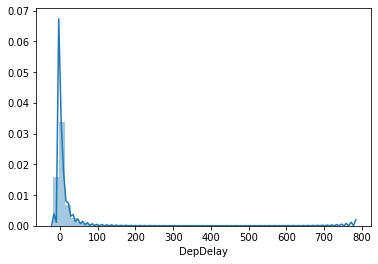

In [10]:
# create a graphic showing the distribution of the non-null DepDelay values
sns.distplot(flights[flights.DepDelay.notnull()]['DepDelay'])

Note the severe right skew of the distribution for the DepDelay variable: there seems to be obvious evidence of outlier values, and those outliers are likely to be having a tangible impact on both the distribution AND the summary statistics for the variable (e.g., the mean value).

In [26]:
# find all hflight rows that have DepDelay values whose values are 
# > 2.5 standard deviations from the mean of data in that column
depdel_outlier = flights[np.abs(flights['DepDelay']-flights['DepDelay'].mean()) > 2.5*flights['DepDelay'].std()]
depdel_outlier

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
16,2011,1,17,1,1530.0,1634.0,AA,428,N518AA,64.0,...,84.0,90.0,IAH,DFW,224,8.0,8.0,0,NaN,0
73,2011,1,14,5,2119.0,2229.0,AA,533,N549AA,70.0,...,69.0,74.0,IAH,DFW,224,5.0,20.0,0,NaN,0
96,2011,1,9,7,1835.0,1951.0,AA,1121,N574AA,76.0,...,126.0,125.0,IAH,DFW,224,9.0,17.0,0,NaN,0
98,2011,1,11,2,1752.0,1855.0,AA,1121,N586AA,63.0,...,70.0,82.0,IAH,DFW,224,8.0,14.0,0,NaN,0
128,2011,1,10,1,1934.0,2235.0,AA,1294,N3BXAA,121.0,...,80.0,99.0,IAH,MIA,964,3.0,11.0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19976,2011,2,25,5,1328.0,1515.0,CO,1620,N75433,167.0,...,95.0,108.0,IAH,PHX,1009,3.0,21.0,0,NaN,0
19977,2011,2,25,5,1612.0,1717.0,CO,1621,N37255,65.0,...,90.0,102.0,IAH,MFE,316,4.0,11.0,0,NaN,0
19980,2011,2,25,5,2000.0,14.0,CO,1632,N21723,194.0,...,129.0,145.0,IAH,LGA,1416,5.0,31.0,0,NaN,0
19986,2011,2,25,5,1754.0,2154.0,CO,1676,N33294,180.0,...,94.0,109.0,IAH,PHL,1324,6.0,17.0,0,NaN,0


The results show that we've found 529 outlier values for DepDelay out of the 20,000 rows we have in the data set. 529/20,000 = 2.645% of the total rows have DepDelay values that fall more than 2.5 standard deviations away from the mean.

In [28]:
depdel_outlier.shape

(529, 21)

In [33]:
depdel_outlier.DepDelay.describe()

count    529.000000
mean     114.325142
std       57.401927
min       69.000000
25%       79.000000
50%       97.000000
75%      131.000000
max      780.000000
Name: DepDelay, dtype: float64

What happens to the summary statistics for the DepDelay variable if we remove these 529 extreme outliers?

In [36]:
# create a temporary series for the DepDelay variable
DepDelay_temp = flights.DepDelay

In [41]:
# now remove the extreme outliers from the temporary series
remove_outliers = DepDelay_temp.drop(depdel_outlier.index)

In [43]:
# get summary statistics after the extreme outliers have been removed
remove_outliers.describe()

count    19256.000000
mean         5.384919
std         13.449763
min        -18.000000
25%         -3.000000
50%          0.000000
75%          9.000000
max         68.000000
Name: DepDelay, dtype: float64

Note how the mean decreased from 8.2977 to 5.384919 while the standard deviation decreased from 23.934218 to 13.449763: these are significant changes, i.e., __the mean value has decreased by more than 35%__ while __the standard deviation value has decreased by more than 43%__.\
Let's look at how the removal of the extreme outliers effected the distribution of the variable:

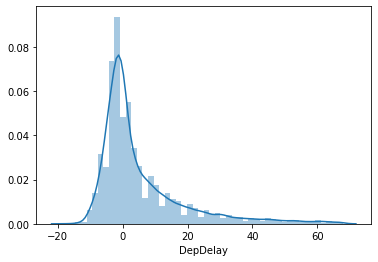

In [44]:
# create a graphic showing the distribution of the non-null DepDelay values
sns.distplot(remove_outliers[remove_outliers.notnull()])

Let's make a facet plot showing how these DepDelay outliers are distributed by UniqueCarrier and Origin:

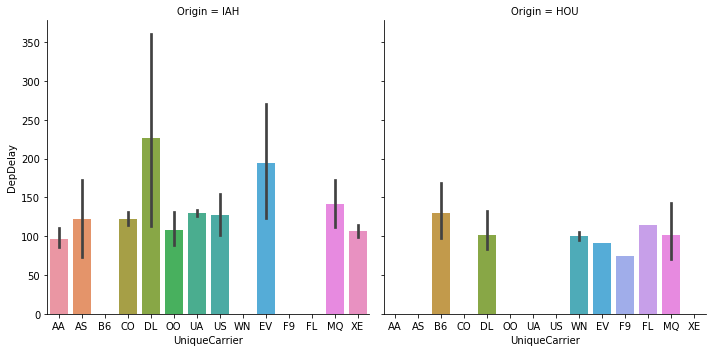

In [54]:
# facet grid for UniqueCarrier vs. DepDelay outliers by point of origin
sns.catplot(data= depdel_outlier , x = 'UniqueCarrier', y = 'DepDelay', 
            col = 'Origin',kind = 'bar')

We see that airlines flying out of IAH appear to experience longer average extreme departure delays than do airlines flying out of HOU. What might be the reason for this?\
We also see that Delta ('DL') seems to experience the highest average severe departure delays of the airlines flying out of IAH. Let's see if we can identify the destinations most impacted by such delays:

In [57]:
# display a list of extreme departure delays for Delta w origin = IAH
depdel_outlier[(depdel_outlier.UniqueCarrier == 'DL') & (depdel_outlier.Origin == 'IAH')]

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
6418,2011,1,1,6,1709.0,2000.0,DL,8,N760NC,111.0,...,59.0,71.0,IAH,ATL,689,11.0,14.0,0,NaN,0
6500,2011,1,12,3,1758.0,2104.0,DL,8,N910DL,126.0,...,121.0,119.0,IAH,ATL,689,20.0,17.0,0,NaN,0
6507,2011,1,12,3,1038.0,1340.0,DL,1900,N934DL,122.0,...,210.0,218.0,IAH,ATL,689,21.0,13.0,0,NaN,0
6529,2011,1,15,6,941.0,1230.0,DL,1248,N366NB,109.0,...,223.0,236.0,IAH,ATL,689,8.0,15.0,0,NaN,0
6532,2011,1,15,6,1737.0,2035.0,DL,1590,N762NC,118.0,...,487.0,488.0,IAH,ATL,689,6.0,18.0,0,NaN,0


From the table above we can see there were five extreme departure delays for Delta having an origin of IAH, all of them having a destination of 'ATL', and two of them occurred on the same day (1/12/2011, 1/15/2011).

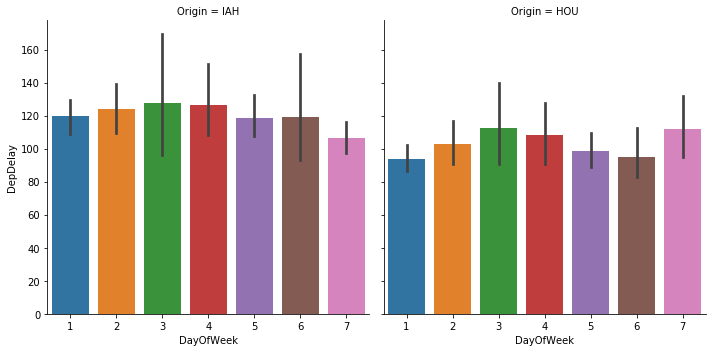

In [58]:
# facet grid for Dest vs. DepDelay outliers by point of origin

sns.catplot(x='DayOfWeek', y='DepDelay', col='Origin',
               kind='bar', data= depdel_outlier);